# <center> <h1>👨‍💻

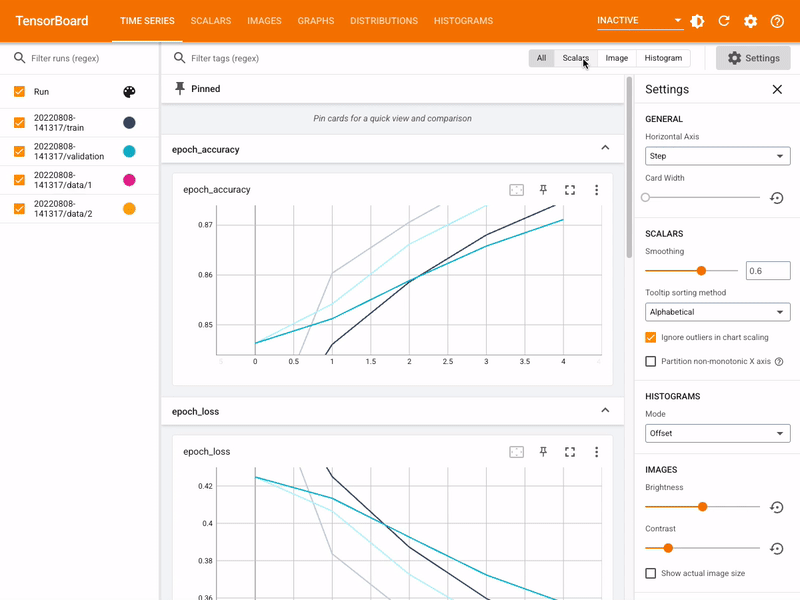

In [15]:
import tensorflow as tf
from keras.utils import image_dataset_from_directory
from keras.models import Sequential, load_model
from keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense
import matplotlib.pyplot as plt
import glob

# <center> First we read our dataset

In [2]:
train_data = image_dataset_from_directory("Datasets/flower_photos/train", image_size=(224,224))


Found 2500 files belonging to 5 classes.


In [3]:
test_data = image_dataset_from_directory("Datasets/flower_photos/test", image_size=(224,224))


Found 100 files belonging to 5 classes.


In [4]:
len(list(train_data))

79

In [16]:
len(list(test_data))

4

In [21]:
classes = train_data.class_names
classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

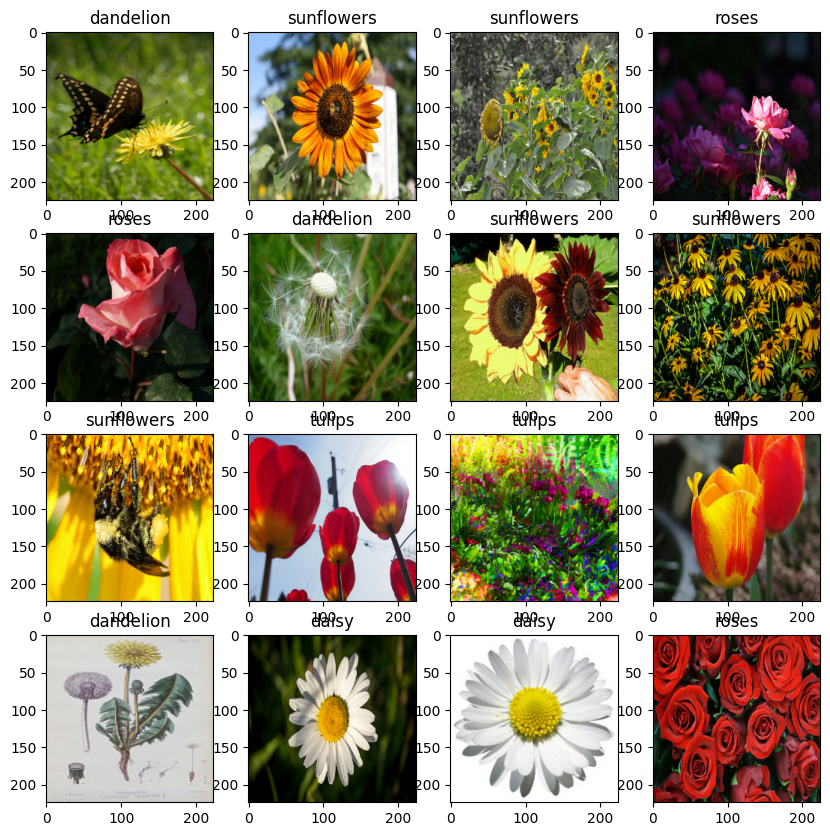

In [30]:
plt.figure(figsize=(10,10))
for image, label in train_data.take(1):
    
    
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.title(classes[label[i]])
        plt.imshow(image[i].numpy().astype("uint8"))
        
        

# <center> EarlyStopping.
### One of the problems we're sure to run into when training our model is overfitting and underfitting. To stop these problems during the train process, we need EarlyStopping.

* ### Imagine you are training a model with 1000 epochs and the model is overfitting or underfitting at epoch 200. what do you do wait for another 800 epochs to train or stop training?

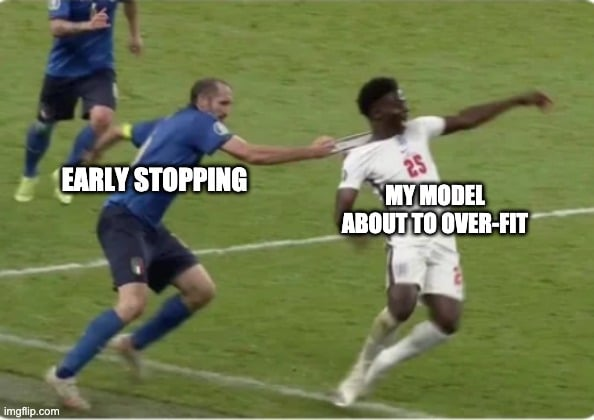

In [5]:
# we will create a model
model = Sequential([
    InputLayer((224,224,3)),
    
    Conv2D(8, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #112x112x8
    
    Conv2D(16, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #56x56x16
    
    Conv2D(32, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #28x28x32
    
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #14x14x64
    
    Flatten(),
    
    Dense(1000, activation="relu"),
    Dense(100, activation="relu"),
    Dense(5, activation="softmax")
    
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")


In [8]:
from keras.callbacks import EarlyStopping

In [9]:
stopping = EarlyStopping(monitor="val_loss",
                        min_delta=0.1,
                        patience=3)


# monitor - this tells us which process we monitor. We chose to observe the validation loss here.
# patience - means to observe i.e. after how many epochs to terminate.
# min_delta - loss changes every epoch if patience=3, i.e., the best loss does not improve by at least 0.1 
# (we chose this value. optional) in 3 epochs, it stops the train

In [9]:
model.fit(train_data, epochs=10, validation_data=test_data, callbacks=[stopping])

# here we got eraly stopping by validation, it can also be done by train
# below we can see that val_loss worked 3 times after 1.2373 (because patience=3 in stopping above) and train stopped
# That is, after the best loss, if the loss does not improve 3 times, we will stop the train


Epoch 1/10
79/79 [==============================] - 17s 99ms/step - loss: 9.3083 - accuracy: 0.2992 - val_loss: 1.4766 - val_accuracy: 0.4000
Epoch 2/10
79/79 [==============================] - 8s 99ms/step - loss: 1.2823 - accuracy: 0.4744 - val_loss: 1.3668 - val_accuracy: 0.4400
Epoch 3/10
79/79 [==============================] - 8s 95ms/step - loss: 0.9808 - accuracy: 0.6144 - val_loss: 1.2373 - val_accuracy: 0.5900
Epoch 4/10
79/79 [==============================] - 8s 101ms/step - loss: 0.7145 - accuracy: 0.7268 - val_loss: 1.1501 - val_accuracy: 0.6700
Epoch 5/10
79/79 [==============================] - 8s 96ms/step - loss: 0.4660 - accuracy: 0.8256 - val_loss: 1.8512 - val_accuracy: 0.5800
Epoch 6/10
79/79 [==============================] - 6s 77ms/step - loss: 0.3101 - accuracy: 0.8968 - val_loss: 2.5217 - val_accuracy: 0.5800


# <center> ModelCheckpoint

# <center> ModelCheckpoint - used to save the model. We can use this saved model later. For example, we train 100 epochs and we can save the epoch with the best loss and accuracy, or we can save the 98th epoch.

In [10]:
# we will create a model
model2 = Sequential([
    InputLayer((224,224,3)),
    
    Conv2D(8, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #112x112x8
    
    Conv2D(16, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #56x56x16
    
    Conv2D(32, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #28x28x32
    
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #14x14x64
    
    Flatten(),
    
    Dense(1000, activation="relu"),
    Dense(100, activation="relu"),
    Dense(5, activation="softmax")
    
])

In [11]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 8)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 32)      

In [12]:
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")


In [13]:
from keras.callbacks import ModelCheckpoint

In [17]:
modelcheck = ModelCheckpoint("Checkpoints/flowers1/-{epoch}.ckpt",  # which folder to save to
                            monitor="val_loss")   # monitoring which loss


In [19]:
model2.fit(train_data, epochs=10, validation_data=test_data, callbacks=modelcheck)
# We save our model after each epoch to the checkpoints/flowers1 folder


Epoch 1/10
78/79 [============================>.] - ETA: 0s - loss: 1.1238 - accuracy: 0.5597

INFO:tensorflow:Assets written to: Checkpoints/flowers1\-1.ckpt\assets


INFO:tensorflow:Assets written to: Checkpoints/flowers1\-1.ckpt\assets


79/79 [==============================] - 9s 112ms/step - loss: 1.1227 - accuracy: 0.5604 - val_loss: 1.0054 - val_accuracy: 0.6300
Epoch 2/10
79/79 [==============================] - ETA: 0s - loss: 0.8820 - accuracy: 0.6676

INFO:tensorflow:Assets written to: Checkpoints/flowers1\-2.ckpt\assets


INFO:tensorflow:Assets written to: Checkpoints/flowers1\-2.ckpt\assets


79/79 [==============================] - 8s 104ms/step - loss: 0.8820 - accuracy: 0.6676 - val_loss: 0.9517 - val_accuracy: 0.6400
Epoch 3/10
79/79 [==============================] - ETA: 0s - loss: 0.5771 - accuracy: 0.7852

INFO:tensorflow:Assets written to: Checkpoints/flowers1\-3.ckpt\assets


INFO:tensorflow:Assets written to: Checkpoints/flowers1\-3.ckpt\assets


79/79 [==============================] - 9s 110ms/step - loss: 0.5771 - accuracy: 0.7852 - val_loss: 1.0396 - val_accuracy: 0.6200
Epoch 4/10
78/79 [============================>.] - ETA: 0s - loss: 0.3947 - accuracy: 0.8698

INFO:tensorflow:Assets written to: Checkpoints/flowers1\-4.ckpt\assets


INFO:tensorflow:Assets written to: Checkpoints/flowers1\-4.ckpt\assets


79/79 [==============================] - 13s 159ms/step - loss: 0.3942 - accuracy: 0.8700 - val_loss: 1.0830 - val_accuracy: 0.6200
Epoch 5/10
78/79 [============================>.] - ETA: 0s - loss: 0.2067 - accuracy: 0.9395

INFO:tensorflow:Assets written to: Checkpoints/flowers1\-5.ckpt\assets


INFO:tensorflow:Assets written to: Checkpoints/flowers1\-5.ckpt\assets


79/79 [==============================] - 11s 138ms/step - loss: 0.2077 - accuracy: 0.9392 - val_loss: 1.3478 - val_accuracy: 0.6600
Epoch 6/10
78/79 [============================>.] - ETA: 0s - loss: 0.1322 - accuracy: 0.9603

INFO:tensorflow:Assets written to: Checkpoints/flowers1\-6.ckpt\assets


INFO:tensorflow:Assets written to: Checkpoints/flowers1\-6.ckpt\assets


79/79 [==============================] - 12s 152ms/step - loss: 0.1320 - accuracy: 0.9604 - val_loss: 1.6618 - val_accuracy: 0.6400
Epoch 7/10
79/79 [==============================] - ETA: 0s - loss: 0.0996 - accuracy: 0.9692

INFO:tensorflow:Assets written to: Checkpoints/flowers1\-7.ckpt\assets


INFO:tensorflow:Assets written to: Checkpoints/flowers1\-7.ckpt\assets


79/79 [==============================] - 12s 145ms/step - loss: 0.0996 - accuracy: 0.9692 - val_loss: 1.4132 - val_accuracy: 0.6900
Epoch 8/10
78/79 [============================>.] - ETA: 0s - loss: 0.0650 - accuracy: 0.9832

INFO:tensorflow:Assets written to: Checkpoints/flowers1\-8.ckpt\assets


INFO:tensorflow:Assets written to: Checkpoints/flowers1\-8.ckpt\assets


79/79 [==============================] - 9s 106ms/step - loss: 0.0649 - accuracy: 0.9832 - val_loss: 1.8042 - val_accuracy: 0.6400
Epoch 9/10
78/79 [============================>.] - ETA: 0s - loss: 0.0368 - accuracy: 0.9916

INFO:tensorflow:Assets written to: Checkpoints/flowers1\-9.ckpt\assets


INFO:tensorflow:Assets written to: Checkpoints/flowers1\-9.ckpt\assets


79/79 [==============================] - 9s 117ms/step - loss: 0.0367 - accuracy: 0.9916 - val_loss: 1.8098 - val_accuracy: 0.6400
Epoch 10/10
78/79 [============================>.] - ETA: 0s - loss: 0.0201 - accuracy: 0.9956

INFO:tensorflow:Assets written to: Checkpoints/flowers1\-10.ckpt\assets


INFO:tensorflow:Assets written to: Checkpoints/flowers1\-10.ckpt\assets


79/79 [==============================] - 11s 132ms/step - loss: 0.0201 - accuracy: 0.9956 - val_loss: 1.8074 - val_accuracy: 0.6500


### `Reload and use our saved model.`

In [22]:
files = glob.glob("Checkpoints/flowers1/"+"/*")
files

['Checkpoints/flowers1\\-1.ckpt',
 'Checkpoints/flowers1\\-10.ckpt',
 'Checkpoints/flowers1\\-2.ckpt',
 'Checkpoints/flowers1\\-3.ckpt',
 'Checkpoints/flowers1\\-4.ckpt',
 'Checkpoints/flowers1\\-5.ckpt',
 'Checkpoints/flowers1\\-6.ckpt',
 'Checkpoints/flowers1\\-7.ckpt',
 'Checkpoints/flowers1\\-8.ckpt',
 'Checkpoints/flowers1\\-9.ckpt']

In [23]:
file_name = max(files, key=os.path.getctime) # we'll get the most recent one, assuming that the most recently 
file_name                                    # saved one is the best

'Checkpoints/flowers1\\-10.ckpt'

In [26]:
file_name = "Checkpoints/flowers1/-5.ckpt"
file_name  
# Get the one at checkpoint 5

'Checkpoints/flowers1/-5.ckpt'

In [27]:
model3 = load_model(file_name)
model3

In [28]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 8)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 32)      

In [29]:
model3.fit(train_data, epochs=10)
# so we loaded model3 from epoch 5 of model2 and continued training it from there.

Epoch 1/10
79/79 [==============================] - 30s 232ms/step - loss: 0.3329 - accuracy: 0.8796
Epoch 2/10
79/79 [==============================] - 8s 69ms/step - loss: 0.1998 - accuracy: 0.9360
Epoch 3/10
79/79 [==============================] - 5s 64ms/step - loss: 0.1117 - accuracy: 0.9656
Epoch 4/10
79/79 [==============================] - 5s 64ms/step - loss: 0.1023 - accuracy: 0.9708
Epoch 5/10
79/79 [==============================] - 5s 64ms/step - loss: 0.0700 - accuracy: 0.9784
Epoch 6/10
79/79 [==============================] - 16s 201ms/step - loss: 0.0852 - accuracy: 0.9752
Epoch 7/10
79/79 [==============================] - 8s 91ms/step - loss: 0.1387 - accuracy: 0.9608
Epoch 8/10
79/79 [==============================] - 5s 62ms/step - loss: 0.0801 - accuracy: 0.9752
Epoch 9/10
79/79 [==============================] - 18s 233ms/step - loss: 0.1193 - accuracy: 0.9600
Epoch 10/10
79/79 [==============================] - 5s 61ms/step - loss: 0.0793 - accuracy: 0.9756


#### EaryStopping and ModelCheckpoint can be used together as follows
`model.fit(train_data, epochs=10, callbacks=[stopping, modelcheck])`

# <center> Tensorboard

# <center> Tensorboard - helps us visualize the graph of accuracy and loss in our model. With tensorboard we can visually see the architecture of our model, histograms.

In [30]:
# we will create a model
model4 = Sequential([
    InputLayer((224,224,3)),
    
    Conv2D(8, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #112x112x8
    
    Conv2D(16, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #56x56x16
    
    Conv2D(32, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #28x28x32
    
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #14x14x64
    
    Flatten(),
    
    Dense(1000, activation="relu"),
    Dense(100, activation="relu"),
    Dense(5, activation="softmax")
    
])

In [31]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 8)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 28, 28, 32)      

In [32]:
model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [33]:
from keras.callbacks import TensorBoard

In [34]:
modelcheck = ModelCheckpoint("Checkpoints/flowers2/-{epoch}.ckpt",  # which folder to save to
                            monitor="loss")   # tracking which loss

In [38]:
#!pip install tensorboard


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
tensor_board = TensorBoard(log_dir="Checkpoints/flowers2/",histogram_freq=1)

In [36]:
model4.fit(train_data, epochs=10, validation_data=test_data, callbacks=tensor_board)
# We save our model after each epoch to the checkpoints/flowers2 folder


Epoch 1/10
79/79 [==============================] - 37s 451ms/step - loss: 23.8721 - accuracy: 0.3268 - val_loss: 1.2980 - val_accuracy: 0.4500
Epoch 2/10
79/79 [==============================] - 35s 366ms/step - loss: 1.2006 - accuracy: 0.5212 - val_loss: 1.1816 - val_accuracy: 0.5700
Epoch 3/10
79/79 [==============================] - 17s 210ms/step - loss: 0.9454 - accuracy: 0.6336 - val_loss: 1.3522 - val_accuracy: 0.5500
Epoch 4/10
79/79 [==============================] - 20s 251ms/step - loss: 0.6771 - accuracy: 0.7512 - val_loss: 1.2203 - val_accuracy: 0.5800
Epoch 5/10
79/79 [==============================] - 17s 214ms/step - loss: 0.4166 - accuracy: 0.8576 - val_loss: 1.3337 - val_accuracy: 0.5600
Epoch 6/10
79/79 [==============================] - 14s 169ms/step - loss: 0.3283 - accuracy: 0.8896 - val_loss: 1.6217 - val_accuracy: 0.4900
Epoch 7/10
79/79 [==============================] - 27s 342ms/step - loss: 0.2715 - accuracy: 0.9136 - val_loss: 1.9196 - val_accuracy: 0.580

### How to use TensorBoard?

### First, we activate the kernel
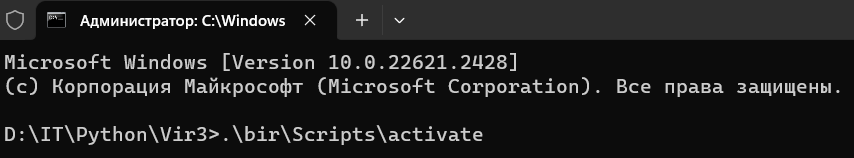

### Step 2. tensorboard --logdir D:\IT\Python\Vir3\bir\Checkpoints\flowers2 we write in cmd (after logdir everyone shows the folder where tensorboard is saved)
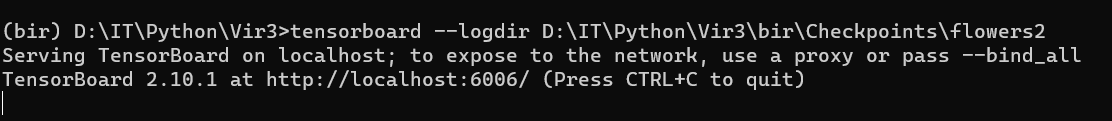

### Step 3. Open http://localhost:6006/ in the browser

## <center> Accuracy
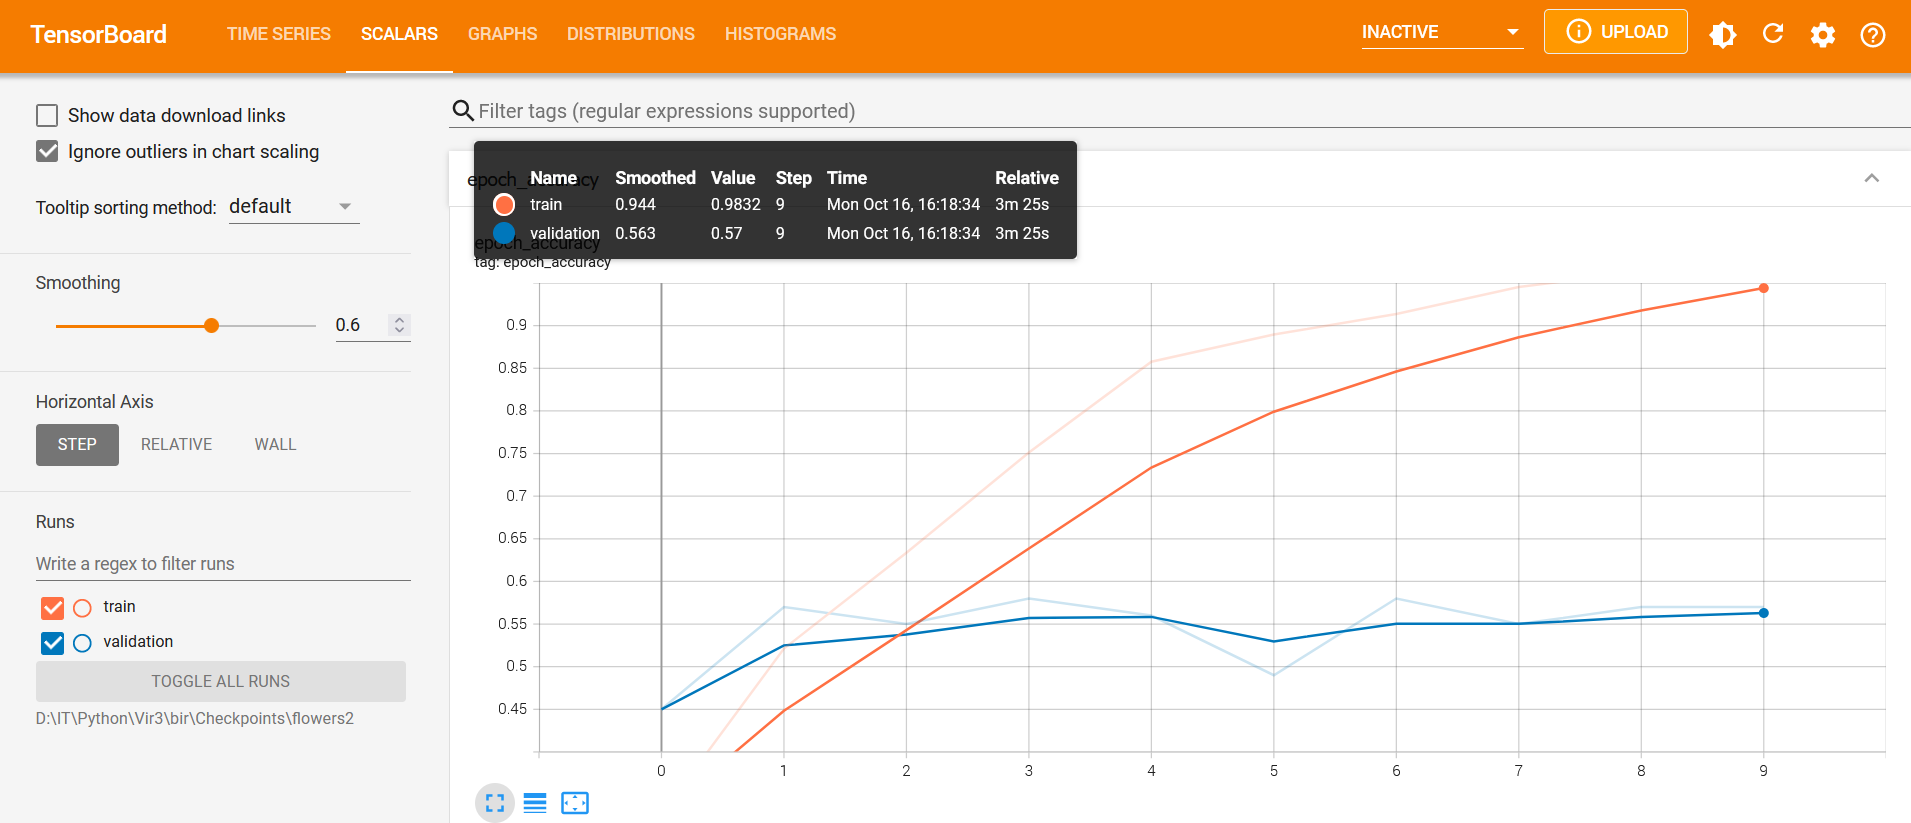

## <center> Loss
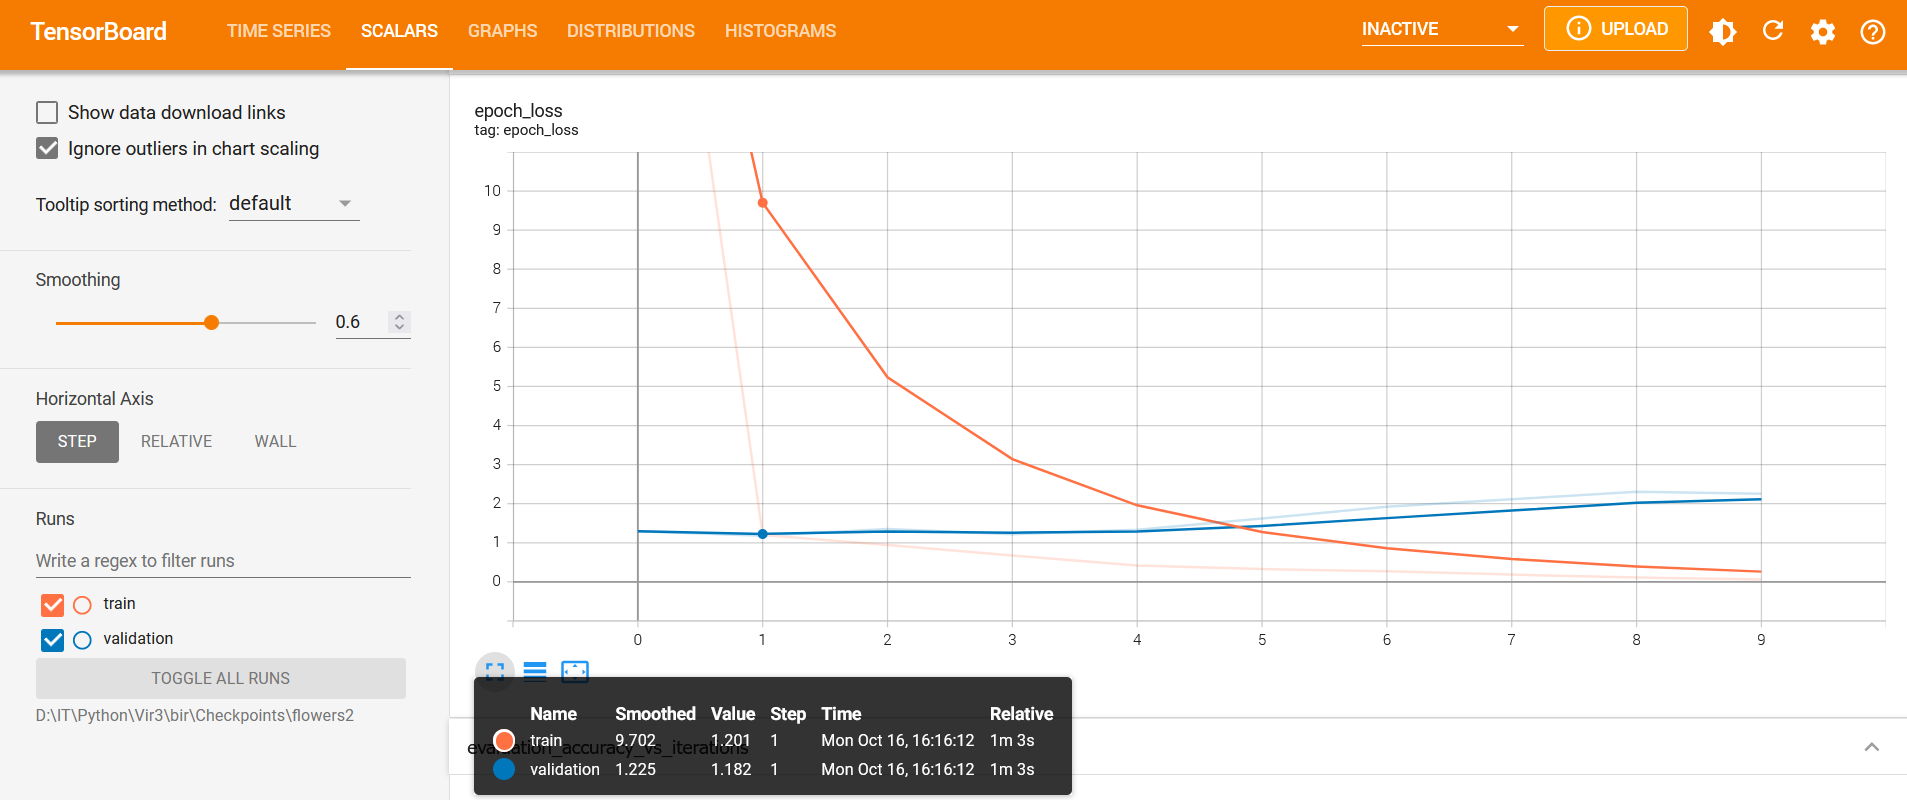

## By going to the GRAPHS section, we can see the architecture of our model.
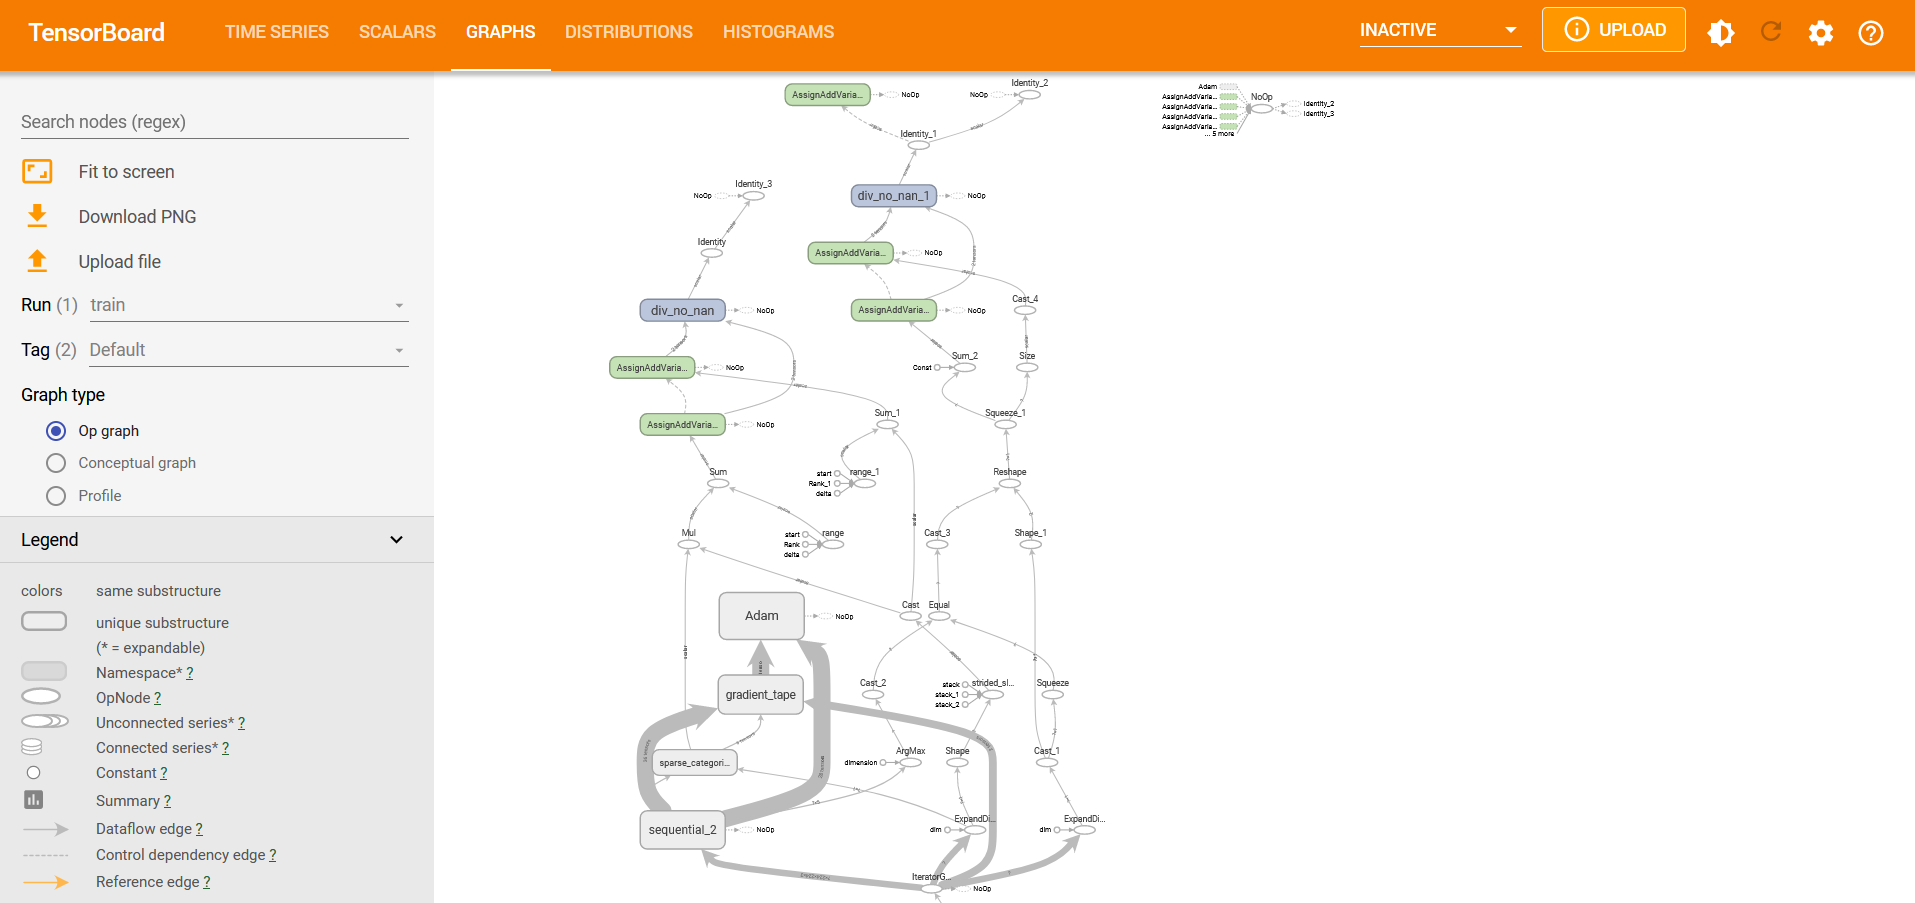

## For example, we can see a more detailed architecture by double-clicking on sequential_2.
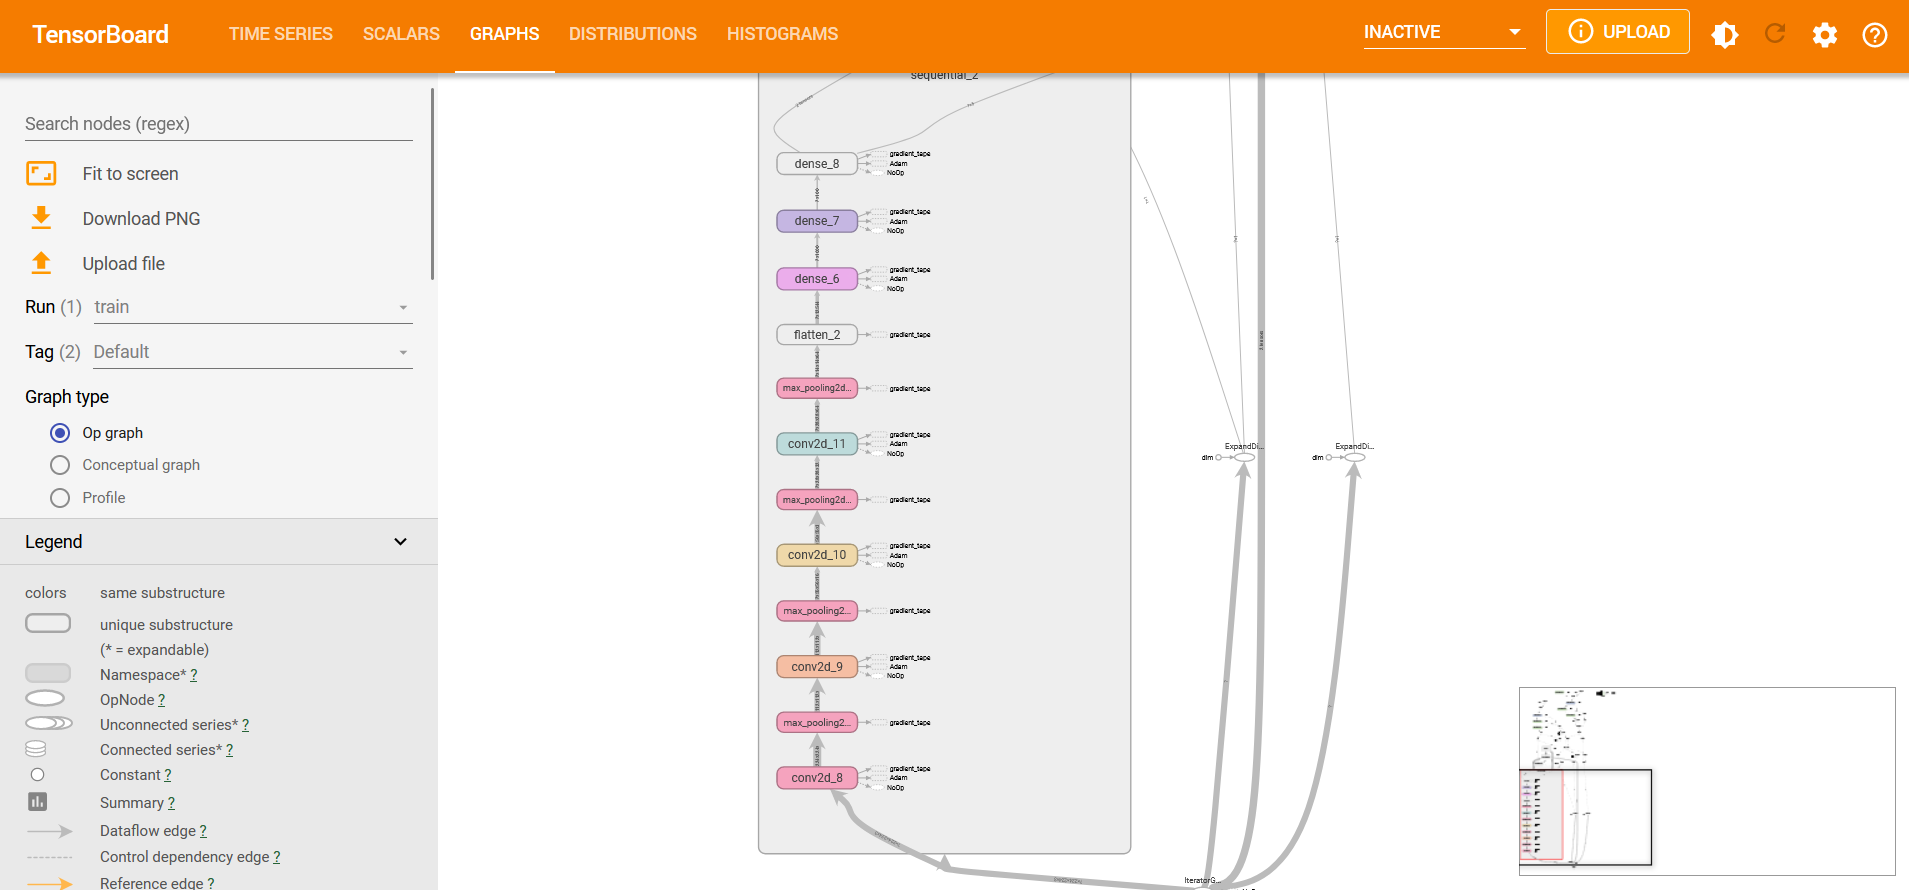

# <center> <h1> 👨‍💻   🚀  